# 📝 **Práctica**: Cross-validation framework

En los notebooks anteriores, introdujimos algunos conceptos relacionados con la evaluación de modelos predictivos. En esta sección, nuestro objetivo es profundizar en el framework de la validación cruzada (cross-validation).

Antes de adentrarnos en el tema, detengámonos un momento en las razones por las cuales siempre debemos tener conjuntos de entrenamiento y de prueba. Primero, analicemos las limitaciones de usar un conjunto de datos sin dejar ninguna muestra fuera.

Para ilustrar los diferentes conceptos, utilizaremos el conjunto de datos de viviendas de California (California housing dataset).

In [1]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
data, target = housing.data, housing.target

En este conjunto de datos, el objetivo es predecir el valor medio de las viviendas en una zona de California. Las características recopiladas se basan en información general sobre bienes raíces y datos geográficos.

Por lo tanto, la tarea a resolver es diferente de la presentada en el notebook anterior. La variable objetivo que se desea predecir es continua, no discreta. Esta tarea se conoce como regresión. Por ello, utilizaremos un modelo predictivo específico para regresión y no para clasificación.

Veamos la descripción del set de datos para tener un mejor entendimiento del modelo de regresión que se pretende usar.

In [2]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Ahora veamos los primeros 5 datos y el objetivo (target)

In [3]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
target.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


Para simplificar las visualizaciones futuras, transformemos los precios del rango de centenas de miles de dólares (100k) al rango de miles de dólares (1k).

In [5]:
target *= 100
target.head()

,MedHouseVal
0,452.6
1,358.5
2,352.1
3,341.3
4,342.2


## Error de entrenamiento vs error de prueba

En esta sección analizaremos el error de entrenamiento y el de prueba para ver la importancia de dividir el conjunto de datos en datos de entrenamiento y de prueba. Como modelo de regresión, utilizaremos un modelo basado en árboles de decisión.

Entrenemos el modelo utilizando todos los datos.

In [6]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(data, target)

DecisionTreeRegressor(random_state=0)

Después del entrenamiento, queremos saber su potencial para generalizar. Para medir su desempeño utilizaremos el error absoluto medio.

In [7]:
from sklearn.metrics import mean_absolute_error

target_predicted = regressor.predict(data)
score = mean_absolute_error(target, target_predicted)
print(f"En promedio, el modelo de regresión tuvo un error de {score:.2f} k")

En promedio, el modelo de regresión tuvo un error de 0.00 k


Nota que obtuvimos predicciones perfectas, con cero error. Este resultado pareciera bueno, sin embargo, no lo es, en realidad es un problema de un entrenamiento inadecuado.

Lo que sucedió es que el modelo se entrenó y se probó con el mismo conjunto de datos. Lo que hizo el árbol de decisión fue memorizar cada dato durante el entrenamiento y, por ese motivo, hizo predicciones exactas durante las pruebas.  

El error que se genera al evaluar un modelo con los datos de entrenamiento es conocido como "**Error empírico**" o "**Error de entrenamiento**".

Entrenamos un modelo predictivo para minimizar el error de entrenamiento, pero nuestro objetivo real es minimizar el error en los datos que no han sido vistos antes. El error que se generaría cuando un modelo entrenado se prueba sobre datos no vistos (datos nuevos) es conocido como "**Error de generalizacion**".

Entonces, una evaluación básica debe incluir:

* Separar los datos en dos subconjuntos: uno para entrenamiento (training) y otro para prueba (testing)
* Entrenar el modelo con el set de datos de entrenamiento
* Estimar el error de entrenamiento con el set de datos de entrenamiento
* Estimaar el error de prueba con el set de datos de prueba

Dicho eso, separemos entonces el set de datos en training y testing

In [8]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=0)

Ahora, entrenemos el modelo usando los datos de entrenamiento.

In [9]:
regressor.fit(data_train, target_train)

DecisionTreeRegressor(random_state=0)

Finalmente, estimamos los diferentes tipos de errores. Comencemos con el error de entrenamiento.

In [10]:
target_predicted = regressor.predict(data_train)
score = mean_absolute_error(target_train, target_predicted)
print(f"El error de entrenamiento del modelo es {score:.2f} k")

El error de entrenamiento del modelo es 0.00 k


Observamos el mismo fenómeno que en el entrenamiento anterior: el modelo vuelve a memorizar los datos, aunque esta vez solo ha memorizado los datos de entrenamiento. Ahora calculemos el error de prueba.

In [11]:
target_predicted = regressor.predict(data_test)
score = mean_absolute_error(target_test, target_predicted)
print(f"El error de prueba del modelo es {score:.2f} k$")

El error de prueba del modelo es 47.28 k$


El error de prueba es justo lo que se esperaba del modelo al probarlo con dato nuevos.

## Estabilidad de las estimaciones en la validación cruzada

Cuando realizamos una única división entre entrenamiento y prueba, no obtenemos información sobre la robustez de la evaluación de nuestro modelo predictivo. En particular, si el conjunto de prueba es pequeño, esta estimación del error de prueba será inestable y no reflejará la “tasa de error real” que observaríamos con el mismo modelo en una cantidad ilimitada de datos de prueba.

Por ejemplo, podríamos tener suerte al realizar una división aleatoria del conjunto de datos limitado y, por casualidad, incluir en el conjunto de prueba algunos de los casos más fáciles de predecir. En ese caso, la estimación del error de prueba sería demasiado optimista.

La validación cruzada permite estimar la robustez de un modelo predictivo repitiendo el procedimiento de división varias veces. De esta manera se obtienen múltiples errores de entrenamiento y de prueba, lo que permite estimar la variabilidad del rendimiento de generalización del modelo.

Existen diferentes estrategias de validación cruzada, pero por ahora nos centraremos en una llamada “shuffle-split”. En cada iteración de esta estrategia se realiza lo siguiente:


*   Se barajan aleatoriamente las muestras de una copia del conjunto de datos completo
*   Se divide el conjunto barajado en un conjunto de entrenamiento y otro de prueba
*   Se entrena un nuevo modelo con el conjunto de entrenamiento
*   Se evalúa el error de prueba en el conjunto de prueba

Este procedimiento se repite `n_splits` veces. Ten en cuenta que el costo computacional aumenta con el número de divisiones (`n_splits`).



## Diagrama de validación cruzada
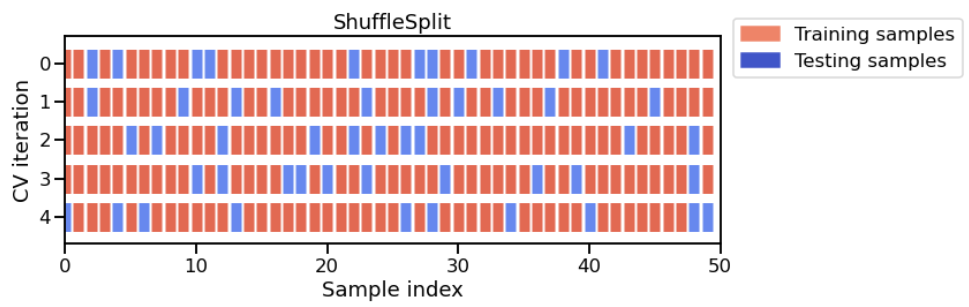



Nota:
Esta figura muestra el caso particular de la estrategia de validación cruzada **shuffle-split** con `n_splits = 5`. En cada división, el procedimiento entrena un modelo con todas las muestras rojas y evalúa su puntuación con las muestras azules.

En nuestro caso, configuraremos `n_splits = 40`, lo que significa que entrenaremos 40 modelos en total, los cuales serán descartados después: solo registraremos su rendimiento de generalización en cada variante del conjunto de prueba.

Para evaluar el rendimiento de generalización de nuestro regresor, podemos utilizar la función
`sklearn.model_selection.cross_validate` junto con un objeto
`sklearn.model_selection.ShuffleSplit`.

In [12]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=40, test_size=0.3, random_state=0)
cv_results = cross_validate(regressor, data, target, cv=cv, scoring="neg_mean_absolute_error")

Los resultados `cv_results` son guardados en un dicionario de Python, el cual vamos a convertir en un dataframe de pandas para una visualización y manipulación más sencilla.

In [13]:
import pandas as pd

cv_results = pd.DataFrame(cv_results)
cv_results.head()

,fit_time,score_time,test_score
0,0.266501,0.005327,-46.909797
1,0.274316,0.004635,-46.421170
2,0.266010,0.004469,-47.411089
3,0.262888,0.004569,-44.319824
4,0.255481,0.004436,-47.607875


Tip

Una puntuación (score) es una métrica en la que valores más altos indican mejores resultados. Por el contrario, un error es una métrica en la que valores más bajos indican mejores resultados.

El parámetro `scoring` en `cross_validate` siempre espera una función que devuelva una puntuación.

Para facilitar las cosas, todas las métricas de error en scikit-learn (como `mean_absolute_error`) pueden transformarse en una puntuación para usarse dentro de `cross_validate`.
Para hacerlo, basta con pasar una cadena de texto con el nombre de la métrica de error precedida por el prefijo "neg_".

Por ejemplo:  `scoring="neg_mean_absolute_error"`


En este caso, se calculará el valor negativo del error absoluto medio, lo cual es equivalente a una puntuación.


Para obtener el valor real del error, simplemente debemos revertir la negación. En el siguiente código agragamos una columna adicional llamada "test_error" en la que colocamos el error sin la negación.

In [14]:
cv_results["test_error"] = -cv_results["test_score"]

Ahora revisemos los resultados.

In [15]:
cv_results.head(10)

,fit_time,score_time,test_score,test_error
0,0.266501,0.005327,-46.909797,46.909797
1,0.274316,0.004635,-46.421170,46.421170
2,0.266010,0.004469,-47.411089,47.411089
3,0.262888,0.004569,-44.319824,44.319824
4,0.255481,0.004436,-47.607875,47.607875
5,0.274848,0.004581,-45.901300,45.901300
6,0.261633,0.004556,-46.572767,46.572767
7,0.261076,0.004592,-46.194585,46.194585
8,0.266195,0.004556,-45.590236,45.590236
9,0.279906,0.004726,-45.727998,45.727998


En la tabla anterior vemos que se calcula el tiempo de entrenamiento y el de prueba en cada validación cruzada. También se genera el `score`, que corresponde al error de prueba en cada partición (`split`).

In [16]:
len(cv_results)

40

Obtenemos 40 registros en el dataframe de los resultados ya que se efectuaron 40 splits en la validación cruzada. Con esta información podemos mostrar la distribución del error y tener una estimación de su variabiliad, como se ve a continuación.

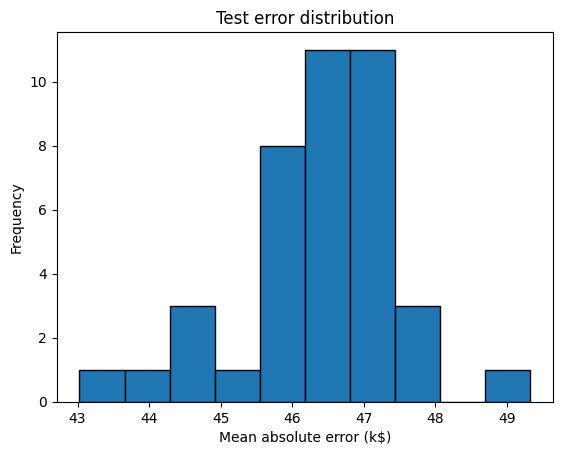

In [17]:
import matplotlib.pyplot as plt

cv_results["test_error"].plot.hist(bins=10, edgecolor="black")
plt.xlabel("Mean absolute error (k$)")
_ = plt.title("Test error distribution")

Observamos que el error de prueba se concentra alrededor de 47K y oscila entre 43k y hasta 50k.

Ahora calculamos el error promedio y la desviación estándar.

In [18]:
print("El promedio del error de prueba es: "f"{cv_results['test_error'].mean():.2f} k")

El promedio del error de prueba es: 46.36 k


In [19]:
print("La desviación estándar del error de prueba es: "f"{cv_results['test_error'].std():.2f} k")

La desviación estándar del error de prueba es: 1.17 k


Nota que la desviación estándar es mucho menor que la media, esto significa que el error de prueba se estima de 46.36k ± 1.17k.

Si fueramos a entrenar un modelo con el set de datos completo (sin usar validación cruzada) y luego tuvieramos acceso a todos los datos para prueba de forma ilimitada, podríamos esperar que el error de prueba estuviera cerca de esta región.

Sin embargo, esta información debe contrastarse con la escala natural de variabilidad del objetivo. Dibujemos la distribución de la variable objetivo.


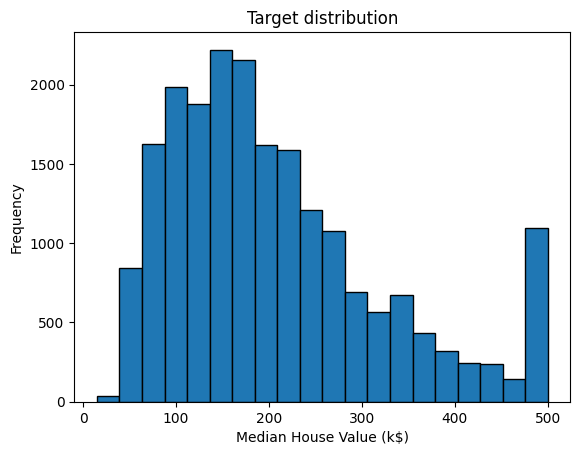

In [20]:
target.plot.hist(bins=20, edgecolor="black")
plt.xlabel("Median House Value (k$)")
_ = plt.title("Target distribution")

In [21]:
print(f"El promedio del objetivo es: {target.mean():.2f} k")
print(f"La desviación estándar del objetivo es: {target.std():.2f} k")

El promedio del objetivo es: 206.86 k
La desviación estándar del objetivo es: 115.40 k


La variable objetivo varía desde valores cercanos a 0k hasta aproximadamente 500k, con un promedio de aproximadamente 206k y una desviación estándar de alrededor de 115k.

Notamos que la estimación media del error de prueba obtenida mediante validación cruzada es un poco menor que la escala natural de variación de la variable objetivo. Además, la media y la desviación estándar de la estimación del error de prueba por validación cruzada es aún más pequeña.

Esto es un buen comienzo, aunque no necesariamente suficiente para decidir si el rendimiento de generalización del modelo es lo bastante bueno como para que su predicción sea útil en la práctica.

Recordemos que nuestro modelo comete, en promedio, un error de aproximadamente 47k. Con esta información y observando la distribución de la variable objetivo, este error podría ser aceptable al predecir el valor de viviendas de 500k, pero resultaría problemático en viviendas con un valor de 50k.

En conclusión, un error de 47k podría ser demasiado grande para usar nuestro modelo de forma automática en la estimación de valores de viviendas sin supervisión experta.

## Más detalles sobre `cross_validate`

Durante la validación cruzada, se entrenan y evalúan muchos modelos. De hecho, el número de elementos en cada arreglo del resultado de `cross_validate` corresponde a cada uno de estos procedimientos de ajuste y evaluación (`fit`/`score`).

Si se desea hacerlo explícito, es posible recuperar los modelos entrenados en cada una de las divisiones (splits o folds) pasando la opción `return_estimator=True` al llamar a la función `cross_validate`.

In [22]:
cv_results = cross_validate(regressor, data, target, return_estimator=True)
cv_results

{'fit_time': array([0.31671906, 0.29948902, 0.29705501, 0.31391835, 0.29439402]),
 'score_time': array([0.00383711, 0.00332999, 0.00404263, 0.00293517, 0.00316119]),
 'estimator': [DecisionTreeRegressor(random_state=0),
  DecisionTreeRegressor(random_state=0),
  DecisionTreeRegressor(random_state=0),
  DecisionTreeRegressor(random_state=0),
  DecisionTreeRegressor(random_state=0)],
 'test_score': array([0.26291527, 0.41947109, 0.44492564, 0.23357874, 0.40788361])}

In [23]:
cv_results["estimator"]

[DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(random_state=0)]

Los cinco regresores de árbol de decisión corresponden a los cinco árboles entrenados en los diferentes folds (subconjuntos) de la validación cruzada. Tener acceso a estos regresores es útil porque permite inspeccionar los parámetros internos ajustados de cada uno de ellos.



Mostremos los parámetros del primer modelo de árbol

In [24]:
cv_results["estimator"][0].get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 0,
 'splitter': 'best'}

En el caso de que solo te interese la puntuación del conjunto de prueba, scikit-learn proporciona la función `cross_val_score`.
Esta función es equivalente a llamar a cross_validate y seleccionar únicamente el valor de `test_score` (como se hizo de forma extensiva en los notebooks anteriores).

In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(regressor, data, target)
scores

array([0.26291527, 0.41947109, 0.44492564, 0.23357874, 0.40788361])

## Actividad
Implementa validación cruzada para el mismo conjunto de dato de entrenamiento y prueba. Pero ahora utiliza KFold para hacer las 40 paticioness (40 folds). Utiliza `random_state=0` y `shuffle=True`. Utiliza también el error absoluto medio para evaluar la generalización del modelo con validación cruzada. Muestra la tabla con los primeros 5 resultados.

In [31]:
#Agrega tu código aquí
from sklearn.model_selection import KFold

cv = KFold(n_splits=40, shuffle=True, random_state=0)
cv_results = cross_validate(regressor, data, target, cv=cv, scoring="neg_mean_absolute_error")
cv_results = pd.DataFrame(cv_results)
cv_results.head(5)

,fit_time,score_time,test_score
0,0.376333,0.002672,-48.595006
1,0.384851,0.002669,-41.643444
2,0.368431,0.003272,-43.899066
3,0.373703,0.002750,-43.859734
4,0.384668,0.002542,-52.499469


Agrega la columna "test_error" al dataframe de los resultados y muestra las primeras 5 filas.

In [32]:
#Agrega tu código aquí.
cv_results["test_error"] = -cv_results["test_score"]
cv_results.head()

,fit_time,score_time,test_score,test_error
0,0.376333,0.002672,-48.595006,48.595006
1,0.384851,0.002669,-41.643444,41.643444
2,0.368431,0.003272,-43.899066,43.899066
3,0.373703,0.002750,-43.859734,43.859734
4,0.384668,0.002542,-52.499469,52.499469


Genera el histograma de los errores de prueba obtenidos.

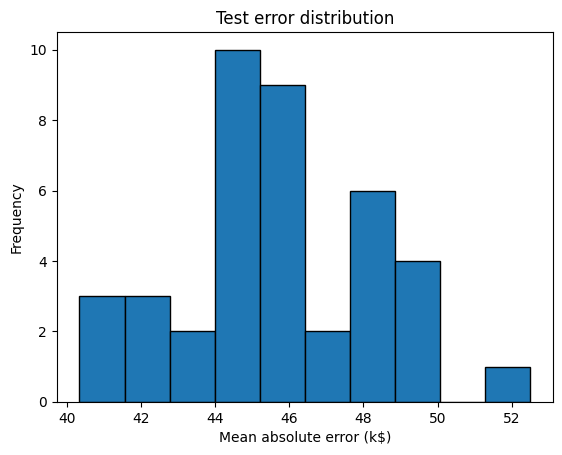

In [36]:
#Agrega tu código aquí.
cv_results["test_error"].plot.hist(bins=10, edgecolor="black")
plt.xlabel("Mean absolute error (k$)")
_ = plt.title("Test error distribution")

Calcula el promedio y la desviación estándar del error de prueba.

In [38]:
#Agrega tu código aquí.
promedio = cv_results['test_error'].mean()
desviacion = cv_results['test_error'].std()
print(f"El promedio es: {promedio}\nY la desviacion estandar es: {desviacion}")

El promedio es: 45.73210988372093
Y la desviacion estandar es: 2.7638284691213144


## Contesta a las sigueintes preguntas

¿Obtuviste los mismo resultados que con ShuffleSplit?

No, el promedio con ShuffleSplit es un poco más alto y la desviación estandar es menor que KFold.

¿Por qué crees que si o que no se obtuvieron los mismos resultados?

Por la manera en la que está entrenado el modelo, ShuffleSplit tiende a tener mejores resultados.

Escribe tu interpretación de los resultados utilizando KFold en cuanto al error de predicción que se generaría considerando los valores de la variable objetivo (target).

El error con KFold está más distribuido que con ShuffleSplit, es decir, hay más frecuencia en todos los errores en KFold y en ShuffleSplit hay menos frecuencia en general, pero hay un par que si tienen mucha más frecuencia que en KFold.


## Resumen
En este notebook vimos:



*   La necesidad de dividir los datos en un conjunto de entrenamiento (train) y un conjunto de prueba (test)
*   El significado de los errores de entrenamiento y de prueba
*   El framework general de la validación cruzada, junto con la posibilidad de estudiar las variaciones en el desempeño de generalización del modelo
*   El uso de ShuffleSplit y KFold para hacer la partición de los datos para aplicar la validación cruzada












# Conclusiones
Los resultados del entrenamiento de los modelos varían por el método por el que se entrena. Para medir la precisión del modelo se utiliza cross-validation, y así podemos verificar las diferencias entre los modelos ya entrenados.